In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv("https://raw.githubusercontent.com/nakshatra108/Gold-Price-Prediction/main/Gold%20Price%20Prediction/gld_price_data.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Data Pre-Processing

In [6]:
correlation = gold_data.corr()

<ipython-input-6-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

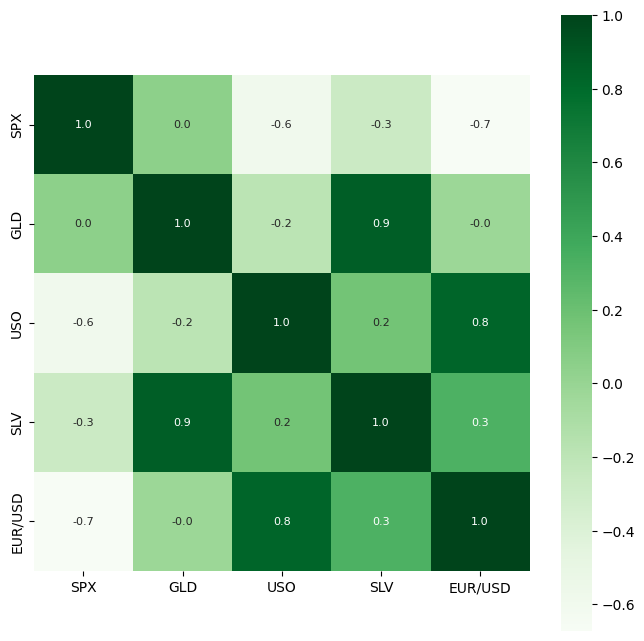

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

<ipython-input-9-1f2cb5e0f3b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

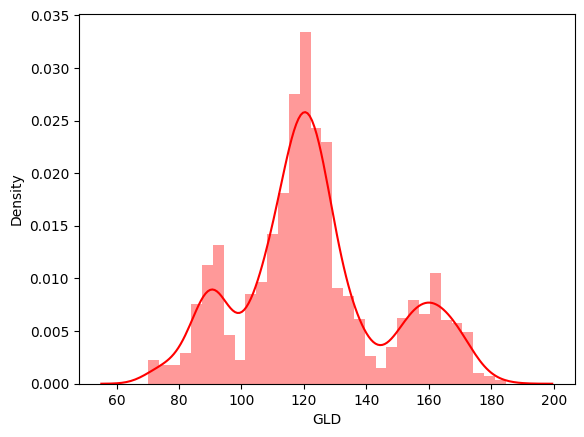

In [9]:
sns.distplot(gold_data['GLD'],color='red')

Feature Splitting


In [10]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Machine Learning Model

RANDOM FOREST CLASSIFIER

In [16]:
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Testing the Model

In [18]:
gold_price_predictor = regressor.predict(X_test)

In [19]:
print(gold_price_predictor)

[168.48299929  81.58630009 115.99560012 127.66600094 120.49270144
 154.72149729 150.2874978  126.15390009 117.4625987  125.76470119
 116.77850112 172.0949008  141.34769832 167.98679896 114.96539996
 117.60260047 138.19510315 170.13060023 159.19140342 157.14099918
 155.1621003  125.65310044 175.69139947 157.77340381 125.22190051
  93.74819988  77.3678999  120.5717     119.05689937 167.53369996
  88.06600079 125.39990009  91.06610064 117.72400015 120.9438991
 136.03680088 115.61500119 115.16650046 147.10059983 107.19850075
 104.5741026   87.25489797 126.70710046 117.98950007 151.72449892
 119.80580001 108.2306001  108.10219832  93.08460023 127.37109713
  74.73390027 113.71149956 121.43780021 111.28219928 118.83999913
 120.2765992  159.8394004  168.89370056 147.08799651  85.99569848
  94.31420047  86.8904984   90.7055     118.96570066 126.44470059
 127.5174     169.98850072 122.21599959 117.5193988   98.49590018
 168.23810153 143.01149876 131.8200025  121.11340207 120.65789951
 119.698100

Validating Original values vs Predicted values

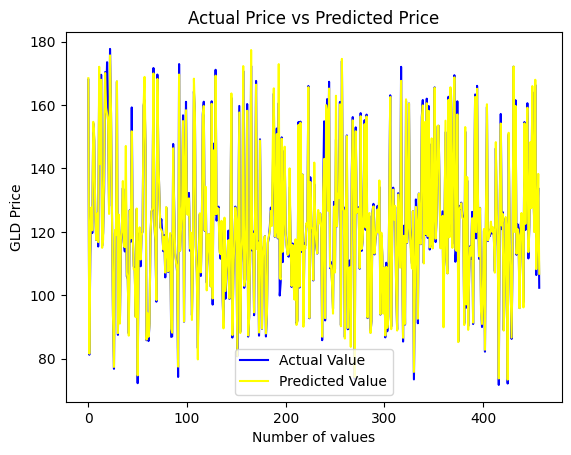

In [22]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(gold_price_predictor, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()